In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [3]:
def get_one_hot(targets):
    targets=np.asarray(targets).reshape(-1)
    num_classes=len(np.unique(targets))
    indices=np.searchsorted(np.unique(targets),targets)
    res = np.eye(num_classes)[indices]
    return res.reshape(len(targets),num_classes)

In [4]:
def mat_ohe(data,cols_to_ohe):
    ohe_cols=np.apply_along_axis(get_one_hot,0,data[:,cols_to_ohe])[:,:,0]
    data=np.hstack((data,ohe_cols))
    data=np.delete(data,cols_to_ohe,1)
    return data.astype(float)

In [5]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

In [6]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [45]:
data=np.random.randn(1000,2)
data2=(25./100.)*np.random.randn(1000,2)
data3=2.5*np.random.randn(1000,2)

circle=np.matrix([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle2=np.matrix(data2)
circle3=np.matrix([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))
X=np.vstack((data,data2,data3))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [46]:
X.shape

(1234, 2)

In [47]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [48]:
X=norm(X,X)

In [49]:
y.shape

(1234, 1)

In [50]:
y=mat_ohe(y,[0])

In [51]:
y.shape

(1234, 3)

In [52]:
colors=["red","blue","green"]

In [53]:
np.array(np.argmax(y,axis=1).reshape(-1))

array([[2, 0, 0, ..., 0, 0, 0]])

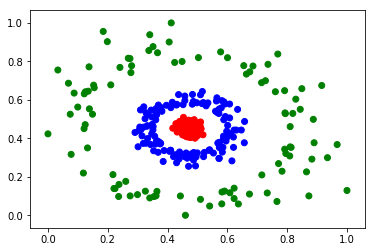

In [54]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(np.argmax(y,axis=1).reshape(-1))[0]])

In [55]:
nodes=[None]*5
Z=[None]*5
d=[None]*4
w=[None]*4
n=[None]*4
b=[None]*4
nodes[0]=X.shape[1]
nodes[1]=6
nodes[2]=10
nodes[3]=6
nodes[4]=y.shape[1]
Z[0]=X
for i in range(4):
    w[i]=np.random.randn(nodes[i],nodes[i+1])
    b[i]=np.random.randn(1,nodes[i+1])
eta=0.000001

In [56]:
nodes

[2, 6, 10, 6, 3]

In [57]:
epochs=10
trerr=[]
epoch=[]

start=time.time()
p_tr=softmax(tanh(tanh(tanh(X@w[0]+b[0])@w[1]+b[1])@w[2]+b[2])@w[3]+b[3])
for i in range(epochs):
    d[3]=p_tr-y
    for j in range(4):
        Z[j+1]=tanh(Z[j]@w[j]+b[j])
        
    for j in range(3):
        d[2-j]=np.multiply(d[3-j]@w[3-j].T,1-np.power(Z[3-j],2))
    for j in range(4):
        w[j]=w[j]-eta*Z[j].T@d[j]
        b[j]=b[j]-eta*np.sum(d[j])
        
    p_tr=softmax(tanh(tanh(tanh(X@w[0]+b[0])@w[1]+b[1])@w[2]+b[2])@w[3]+b[3])
    trerr.append(cost(y,p_tr))
    epoch.append(i)
end=time.time()


0.07012009620666504


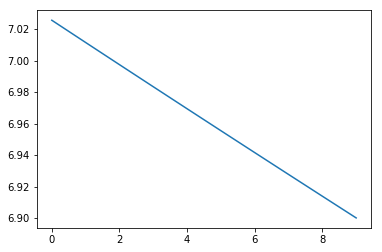

In [58]:
print(end-start)
plt.plot(epoch,trerr)

In [75]:
for i in range(4):
    w[i]=np.random.randn(nodes[i],nodes[i+1])
    b[i]=np.random.randn(1,nodes[i+1])
eta=0.000001

In [78]:
start=time.time()
for i in range(epochs):
    for a in range(X.shape[0]):
        Z[0]=X[a,:].reshape(1,-1)
        p_tr=softmax(tanh(tanh(tanh(Z[0]@w[0]+b[0])@w[1]+b[1])@w[2]+b[2])@w[3]+b[3])
        d[3]=p_tr-y[a,:].reshape(1,-1)
        for j in range(4):
            Z[j+1]=tanh(Z[j]@w[j]+b[j])

        for j in range(3):
            d[2-j]=np.multiply(d[3-j]@w[3-j].T,1-np.power(Z[3-j],2))
        for j in range(4):
            w[j]=w[j]-eta*Z[j].T@d[j]
            b[j]=b[j]-eta*np.sum(d[j])
        
    p_tr=softmax(tanh(tanh(tanh(X@w[0]+b[0])@w[1]+b[1])@w[2]+b[2])@w[3]+b[3])
    trerr.append(cost(y,p_tr))
    epoch.append(i)
end=time.time()


5.280259132385254


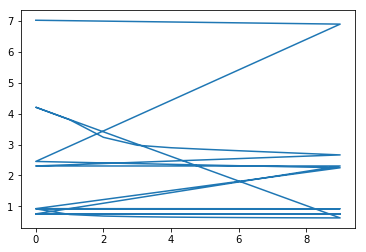

In [79]:
print(end-start)
plt.plot(epoch,trerr)